# Combination of Engineered Stats with Pure Stats
In this notebook I experiment with models that use bith the pure stats and the engineered stats.

In [2]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
pd.options.mode.chained_assignment = None
%config InlineBackend.figure_formats = ['svg']
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [3]:
offensive = ['W', 'G', 'PA', '1B', '2B', '3B', 'HR','BB', 'SB', 'SO', 'BA', 'OBP', 'SLG']
against = ['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A','BB_A', 'SB_A', 'SO_A', 'BA_A', 'OBP_A', 'SLG_A']


combined_features_nopa = ['1B', '2B', '3B', 'HR','BB', 'SB', 'SO', 'OBP', 'SLG',
                          '1B_A', '2B_A', '3B_A', 'HR_A','BB_A', 'SB_A', 'SO_A', 'OBP_A', 'SLG_A']

In [4]:
# create a df of pure stats
offense_df = pd.read_pickle("full_baseball_from_1950_df.pkl")
offense_df["1B"] = offense_df["H"] - offense_df["2B"] - offense_df["3B"] - offense_df["HR"]
offense_df = offense_df[["Year", "Team"]+offensive]

In [5]:
# create a df of pure stats for opponents
opponent_df = pd.read_pickle("opponents_from_1950_df.pkl")
opponent_df["1B"] = opponent_df["H"] - opponent_df["2B"] - opponent_df["3B"] - opponent_df["HR"]
opponent_df.rename(columns={'PA': 'PA_A', '1B':'1B_A', '2B': '2B_A', '3B':'3B_A', 'HR': 'HR_A', 'BB':'BB_A', 
                            'SB': 'SB_A', 'SO': 'SO_A', 'BA': 'BA_A', 'OBP':'OBP_A', 'SLG': 'SLG_A'}, inplace=True)
opponent_df = opponent_df[["Year", "Team"]+against]

In [6]:
opponent_df

,Year,Team,PA_A,1B_A,2B_A,3B_A,HR_A,BB_A,SB_A,SO_A,BA_A,OBP_A,SLG_A
0,1950,BOS,6086,1025,218,49,121,748,32,630,0.270,0.364,0.400
1,1950,LAD,5996,972,223,39,163,591,35,772,0.262,0.338,0.410
2,1950,ATL,6024,1038,212,32,129,554,47,615,0.263,0.335,0.387
3,1950,CHC,6061,1040,251,31,130,593,61,559,0.271,0.346,0.402
4,1950,CHW,6058,1023,193,47,107,734,36,566,0.263,0.356,0.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,2020,STL,1989,233,70,4,69,204,8,464,0.216,0.306,0.380
1768,2020,TBD,2212,316,83,6,70,168,27,552,0.238,0.305,0.391
1769,2020,TEX,2273,302,83,13,81,236,27,489,0.242,0.329,0.419
1770,2020,TOR,2309,322,105,9,81,250,32,519,0.255,0.339,0.436


In [7]:
full_df = pd.merge(offense_df, opponent_df, on=["Year", "Team"])

In [8]:
full_df

,Year,Team,W,G,PA,1B,2B,3B,HR,BB,...,1B_A,2B_A,3B_A,HR_A,BB_A,SB_A,SO_A,BA_A,OBP_A,SLG_A
0,2020,ARI,25,60,37.3,5.18,1.68,0.20,0.97,3.02,...,284,118,11,93,235,40,524,0.253,0.336,0.462
1,2019,ARI,85,162,39.0,5.37,1.78,0.25,1.36,3.33,...,862,289,29,220,516,47,1427,0.251,0.320,0.432
2,2018,ARI,82,162,38.0,4.92,1.60,0.31,1.09,3.46,...,861,259,19,174,522,66,1448,0.239,0.310,0.388
3,2017,ARI,93,162,38.4,5.13,1.94,0.24,1.36,3.57,...,828,276,34,171,516,69,1482,0.240,0.309,0.398
4,2016,ARI,69,162,38.6,5.85,1.76,0.35,1.17,2.86,...,986,337,38,202,603,63,1318,0.275,0.348,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,1973,WSN,79,162,38.6,6.22,1.17,0.14,0.77,4.29,...,991,201,36,128,681,76,866,0.250,0.334,0.371
1768,1972,WSN,70,156,37.3,6.00,1.00,0.14,0.58,3.04,...,966,178,34,103,579,73,888,0.245,0.321,0.351
1769,1971,WSN,71,162,37.6,6.16,1.22,0.18,0.54,3.35,...,1033,210,42,133,658,88,829,0.261,0.341,0.388
1770,1970,WSN,73,162,38.6,5.57,1.30,0.22,0.84,4.07,...,1009,212,51,162,716,78,914,0.261,0.349,0.407


In [9]:
 full_df[['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A', 'BB_A', 'SB_A', 'SO_A']].div(full_df.G, axis=0)

,PA_A,1B_A,2B_A,3B_A,HR_A,BB_A,SB_A,SO_A
0,37.983333,4.733333,1.966667,0.183333,1.550000,3.916667,0.666667,8.733333
1,38.456790,5.320988,1.783951,0.179012,1.358025,3.185185,0.290123,8.808642
2,37.895062,5.314815,1.598765,0.117284,1.074074,3.222222,0.407407,8.938272
3,37.481481,5.111111,1.703704,0.209877,1.055556,3.185185,0.425926,9.148148
4,39.734568,6.086420,2.080247,0.234568,1.246914,3.722222,0.388889,8.135802
...,...,...,...,...,...,...,...,...
1767,38.709877,6.117284,1.240741,0.222222,0.790123,4.203704,0.469136,5.345679
1768,37.910256,6.192308,1.141026,0.217949,0.660256,3.711538,0.467949,5.692308
1769,38.475309,6.376543,1.296296,0.259259,0.820988,4.061728,0.543210,5.117284
1770,39.179012,6.228395,1.308642,0.314815,1.000000,4.419753,0.481481,5.641975


In [10]:
full_df[['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A', 'BB_A', 'SB_A', 'SO_A']] =  full_df[['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A', 'BB_A', 'SB_A', 'SO_A']].div(full_df.G, axis=0)

In [12]:
full_df.to_pickle('full_comined_baseball_stats.pkl')

In [23]:
full_games = full_df[full_df['G']==162]

# Model Function

In [42]:
def test_model(features, target):
    """
    Takes a features dataframe and a target data frame as inputs
    Returns the linear model with the score, predicted values etc 
    """
    
    # create the training and validation sets
    features, features_test, target, target_test = train_test_split(features, target, test_size=.2, random_state=10)
    features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=.25, random_state=3)
    
    # set up the model and fir it with training set
    lr = LinearRegression()
    model = lr.fit(features_train, target_train)
    
    # check the score on the validation set
    val_score = lr.score(features_val, target_val)
    
    # run on the hold out test set
    predicted_vals = model.predict(features_test)
    
    data_dict = {
                'Score': val_score,
                'Predicted_Values': predicted_vals,
                'Target_Values': target_test,
                'Coefficients': lr.coef_,
                'Model': model,
                }
    
    
    return(data_dict)

# Create Linear Model

In [43]:
features = full_games[combined_features_nopa]
target = full_games['W']

std = StandardScaler()
std.fit(features)
scaled_features = std.transform(features)

In [44]:
model_dict = test_model(scaled_features, target);

In [45]:
model_dict["Score"]

0.8203853401080501

In [46]:
for c in zip(features.columns, model_dict["Coefficients"]):
    print(c[0], c[1])

1B -3.4569709528507913
2B -4.161742038208168
3B -1.8116030370375067
HR -7.034051331451779
BB -1.0094145818111526
SB 0.6208646322166922
SO -0.6152063907819947
OBP 5.739769964482153
SLG 13.109582941330622
1B_A 3.075292321518971
2B_A 5.47560668772218
3B_A 2.078138892687216
HR_A 10.387581833031549
BB_A -0.9566869364193252
SB_A -0.9521224578563492
SO_A -0.012886074398278921
OBP_A -2.3366603713184464
SLG_A -20.144400147291083


In [47]:
win_diff = model_dict["Predicted_Values"] - model_dict['Target_Values']

In [50]:
win_diff.abs().describe()

count    230.000000
mean       3.783849
std        2.817700
min        0.002207
25%        1.559349
50%        3.233548
75%        5.528014
max       14.027498
Name: W, dtype: float64

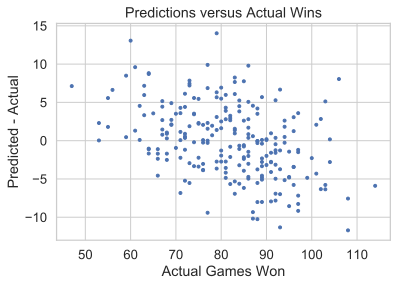

In [48]:
plt.title('Predictions versus Actual Wins')
plt.xticks()
plt.xlabel('Actual Games Won')
plt.ylabel('Predicted - Actual')
plt.plot(model_dict['Target_Values'], win_diff, '.');

# Create Lasso

In [52]:
features = full_games[combined_features_nopa]
target = full_games['W']

std = StandardScaler()
std.fit(features)
scaled_features = std.transform(features)


lasso_model = LassoCV(cv=3, n_alphas=1000)
lasso_model.fit(scaled_features, target)

/Users/ryanwerth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214.69026939360265, tolerance: 15.009665739130433
  positive)


LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=1000, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [54]:
lasso_model.alpha_

0.00673131159059956

In [55]:
features, features_test, target, target_test = train_test_split(scaled_features, target, test_size=.2, random_state=10)
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=.25, random_state=3)

In [56]:
lasso_model = Lasso(alpha = 0.0067) 
lasso_model.fit(features_train, target_train)

/Users/ryanwerth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.4458318117704, tolerance: 8.93891072463768
  positive)


Lasso(alpha=0.0067, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
lasso_model.score(features_val, target_val)

0.8250741854641187

In [58]:
predicted_wins = lasso_model.predict(features_test)
win_diff = predicted_wins - target_test
win_diff.abs().describe()

count    230.000000
mean       3.813762
std        2.802700
min        0.002332
25%        1.615488
50%        3.245950
75%        5.266808
max       13.393145
Name: W, dtype: float64

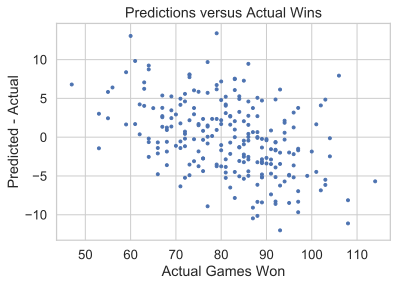

In [59]:
plt.title('Predictions versus Actual Wins')
plt.xticks()
plt.xlabel('Actual Games Won')
plt.ylabel('Predicted - Actual')
plt.plot(target_test, win_diff, '.');

# Create Ridge

In [69]:
features = full_games[combined_features_nopa]
target = full_games['W']

std = StandardScaler()
std.fit(features)
scaled_features = std.transform(features)


ridge_model = RidgeCV(cv=3, alphas=np.arange( -1,  1. , .1 ))
ridge_model.fit(scaled_features, target)

/Users/ryanwerth/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [70]:
ridge_model.alpha_

0.09999999999999964

In [71]:
features, features_test, target, target_test = train_test_split(scaled_features, target, test_size=.2, random_state=10)
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=.25, random_state=3)

In [72]:
ridge_model = Ridge(alpha = 0.1) 
ridge_model.fit(features_train, target_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
ridge_model.score(features_val, target_val)

0.8215394715275772

In [74]:
predicted_wins = ridge_model.predict(features_test)
win_diff = predicted_wins - target_test
win_diff.abs().describe()

count    230.000000
mean       3.785955
std        2.815158
min        0.014518
25%        1.542841
50%        3.193389
75%        5.510041
max       13.941592
Name: W, dtype: float64

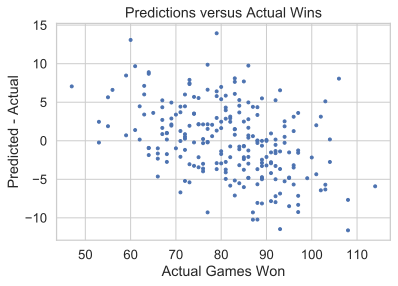

In [75]:
plt.title('Predictions versus Actual Wins')
plt.xticks()
plt.xlabel('Actual Games Won')
plt.ylabel('Predicted - Actual')
plt.plot(target_test, win_diff, '.');